# **Parcial 1**

### **Integrantes**

* Jean C. Trujillo P.
* Juan J. Cervantes S.
* Fernando A. Oliveros O.
* Ricardo G. Pacheco C.

# **Tema: Minas y Energías**

## **Información de la data**
### **Titulo:**  
Meta FNCER: Incorporar en la matriz energética nueva capacidad instalada a partir de Fuentes No Convencionales de Energía Renovable(FNCER)

### **Descripción (proporcionada por la página):**

Incluye informes de capacidad instalada FNCER instalada o pruebas de matriz de producción. En cada corte OR se consideran los proyectos reportados directamente por los agentes, los proyectos registrados en PARATEC (http://paratec.xm.com.co/paratec/SitePages/generacion.aspx?q=capacity) y los proyectos pequeños reportados por los agentes. Las metas son mediciones en diferentes horizontes. La meta de 1500 MW se fijó en el plan nacional de desarrollo para terminar el gobierno. Sin embargo, a fines de 2022, puede superar los 2.000 MW.

### **Resumen de la data:**

Lo que se indica en el texto es que se están llevando a cabo informes sobre la capacidad instalada de las Fuentes No Convencionales de Energía Renovable (FNCER) y pruebas de matriz de producción. Estos informes incluyen proyectos informados directamente por los agentes, proyectos registrados en PARATEC y proyectos pequeños informados por los agentes.

En resumen, se trata de un proceso de medición y registro de la capacidad instalada de las FNCER en Colombia, con el objetivo de alcanzar metas específicas en términos de generación de energía renovable. Se espera que se supere la meta originalmente establecida para fines del 2022.

Con esa información, nos enfocaremos específicamente en estos datos:

 * Energía [kWh/día].
 * Emisiones CO2 [Ton/año].
 * Inversion estimada.
 * Departamento.
 * Municipios.
 * Tipo.
 




# **Librerias**

Las librerias que estamos utilizando para este anàlisis son las de **Pandas** y **Matplotlib**, lo que nos permitirà hacer un anàlisis mas detallado y poder mostrar graficas para mejor entendimiento del mismo.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# **Carga de la data**

A continuación, se presenta la tabla que contiene la data a analizar

In [ ]:
data = pd.read_csv('MetaFNCER.csv')
data

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.80,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.00,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.00,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,BUGA 1 PARTE 2,Solar,5.94,VALLE DEL CAUCA,"""""",76,76,2022-12-31T00:00:00.000,28512,4944,22275000000,41,8326
154,BUGA 1 PARTE 1,Solar,3.96,VALLE DEL CAUCA,"""""",76,76,2022-07-31T00:00:00.000,19008,3296,14850000000,28,5550
155,REFINERÍA GRB,Solar,21.00,SANTANDER,BARRANCABERMEJA,68,68081,2023-12-31T00:00:00.000,100800,17480,78750000000,146,29434
156,EMSA GD Y AG (34 Proyectos),Solar,1.90,META,VILLAVICENCIO,50,50001,2022-05-31T00:00:00.000,9120,1582,8170000000,13,2663


# **Primeros 5 registros**

Aquí vemos los primos cinco registros de la data

In [ ]:
data.head()

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.80,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.00,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.00,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032



# **Información de los datos**
Visualizamos los datos de la data con el método .info() donde se mostrará cada columna, filas, cantidad de datos, sí hay datos nulos y el tipo de dato de esa fila en específico.



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Proyecto                  158 non-null    object 
 1   Tipo                      158 non-null    object 
 2   Capacidad                 158 non-null    float64
 3   Departamento              158 non-null    object 
 4   Municipio                 158 non-null    object 
 5   Código Departamento       158 non-null    int64  
 6   Código Municipio          158 non-null    int64  
 7   Fecha estimada FPO        158 non-null    object 
 8   Energía [kWh/día]         158 non-null    int64  
 9   Usuarios                  158 non-null    int64  
 10  Inversión estimada [COP]  158 non-null    int64  
 11  Empleos estimados         158 non-null    int64  
 12  Emisiones CO2 [Ton/año]   158 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 16.2+ KB


Se obtiene un total de 13 columnas con los siguientes tipos de datos:

* float64 - 1 columnas
* int64 - 7 columnas
* object - 5 columnas

Teniendo un total de **158** filas.

Para mayor comprensión, tenemos ocho (**8**) columnas de tipo **numérico** y cinco (**5**) de tipo texto en donde nos enfocaremos específicamente en:

 * Energía [kWh/día].
 * Emisiones CO2 [Ton/año].
 * Departamento.
 * Municipios.
 * Tipo.
 * Inversion estimada.


 ### **¿Por qué enfocarnos en estas columnas?**

 Para tener claridad de como fueron los resultados de la mediciones realizadas nos enfocaremos en los **Departamentos** y **Municipios** en la cual estas fueron realizadas así como fueron los resultados de estas en los consumos de **energía** y **emisiones** verificando los valores de la **inversión que se estimó** como el **tipo** de la misma.

# **Datos nulos**

Antes de empezar podemos observar que no hay ningún dato faltante en las columnas de la tabla.

In [ ]:
#Muestra los datos nulos y suma el total de estos con el .sum()
data.isnull().sum()

Proyecto                    0
Tipo                        0
Capacidad                   0
Departamento                0
Municipio                   0
Código Departamento         0
Código Municipio            0
Fecha estimada FPO          0
Energía [kWh/día]           0
Usuarios                    0
Inversión estimada [COP]    0
Empleos estimados           0
Emisiones CO2 [Ton/año]     0
dtype: int64

# **Grupo de filas**
Usando el método .iloc[], podemos visualizar un rango de filas de la data.

In [ ]:
data.iloc[5:10]

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
5,AGPE TECNOEMPAQUES DE OCCIDENTE,Solar,0.10,VALLE DEL CAUCA,CALI,76,76001,2019-12-19T00:00:00.000,480,83,430000000,1,140
6,RADAR FAC SAN ANDRÉS,Solar,0.01,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,88,88001,2019-12-30T00:00:00.000,48,8,43000000,0,14
7,AGPE SFV MCDONALDS SOLEDAD,Solar,0.09,ATLÁNTICO,SOLEDAD,8,8758,2020-02-27T00:00:00.000,432,75,387000000,1,126
8,CELSIA SOLAR ESPINAL,Solar,9.90,TOLIMA,ESPINAL,73,73268,2020-05-31T00:00:00.000,47520,8240,42570000000,69,13876
9,FEDERACIÓN NACIONAL DE CAFETEROS,Solar,0.08,TOLIMA,IBAGUÉ,73,73001,2020-09-02T00:00:00.000,384,67,344000000,1,112


# **Grupo de columnas**
Para poder seleccionar un grupo de columnas que tengamos en la data, se hace usando doble corchete y colocando el nombre de la columna.

In [ ]:
data[['Departamento', 'Municipio','Tipo']]

,Departamento,Municipio,Tipo
0,LA GUAJIRA,URIBIA,Eólico
1,VALLE DEL CAUCA,YUMBO,Solar
2,BOLÍVAR,SANTA ROSA,Solar
3,CESAR,EL PASO,Solar
4,META,CASTILLA LA NUEVA,Solar
...,...,...,...
153,VALLE DEL CAUCA,"""""",Solar
154,VALLE DEL CAUCA,"""""",Solar
155,SANTANDER,BARRANCABERMEJA,Solar
156,META,VILLAVICENCIO,Solar


# **Consulta de tres campos cuantitativos**
# **Muestra general**
Acá podemos ver una vista estadística general de la data


In [ ]:
data.describe()

,Capacidad,Código Departamento,Código Municipio,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
count,158.000000,158.000000,158.000000,1.580000e+02,158.000000,1.580000e+02,158.000000,158.000000
mean,37.971646,42.829114,41551.797468,2.312960e+05,40109.063291,1.450582e+11,221.607595,67538.462025
std,78.068671,26.605922,27283.549553,5.070385e+05,87925.819429,2.938303e+11,485.174312,148055.230112
min,0.010000,5.000000,23.000000,2.100000e+01,4.000000,9.800000e+06,0.000000,6.000000
25%,2.275000,17.500000,13675.500000,1.092000e+04,1893.750000,9.513750e+09,16.000000,3189.000000
50%,9.900000,44.000000,44847.000000,4.752000e+04,8240.000000,3.963250e+10,69.000000,13876.000000
75%,20.750000,70.000000,68514.750000,1.123800e+05,19487.750000,8.557000e+10,144.250000,32814.750000
max,700.000000,94.000000,94001.000000,3.360000e+06,582659.000000,2.625000e+12,4872.000000,981120.000000


# **Media**

Al calcular la media de la columna **Emisiones** el resultado que obtenemos el el siguiente:

In [ ]:
media = data['Emisiones CO2 [Ton/año]'].mean()

In [ ]:
media

67538.46202531646

Esto nos da a entender que las emisiones de CO2 tiene un promedio de 67538 toneladas por año.

# **Mediana**

Posteriormente procedemos a realizar la mediana para la misma columna la cual tiene por nombre **emisiones**

In [ ]:
mediana = data['Emisiones CO2 [Ton/año]'].median()

In [ ]:
mediana

13876.0

Llegando a la conclusión de que el la cantidad repetida de **emisiones** es equivalente a **13876.0** toneladas

# **Maximo**
Luego podemos obtener los valores máximos de la columna Emisiones CO2 [Ton/año] con el método .max() 

In [ ]:
maximo = data['Emisiones CO2 [Ton/año]'].max()

In [ ]:
maximo

981120

Podemos observar que el maximo de Emisiones de CO2 es de **981120 toneladas**


# **Mínimo**
Para que podemos obtener los valores mínimos de la columna Emisiones CO2 [Ton/año], lo hacemos con el método .max() 

In [ ]:
minimo = data['Emisiones CO2 [Ton/año]'].min()

In [ ]:
minimo

6

Vemos que el valor minimo de Emisiones CO2 es de **6 Toneladas** 

# **Moda**
Con la moda, podemos sacar el valor que se repite con mayor frecuencia en las columnas

In [ ]:
moda = data['Emisiones CO2 [Ton/año]'].mode()

In [ ]:
moda

0    13876
Name: Emisiones CO2 [Ton/año], dtype: int64

Observamos que el valor de moda es decir el valor que mas se repite en la columna Emisiones CO2 es de 13876 Toneladas.

# **Copia del Data Frame**

Esta copia va a ser almacenada en una variable que tiene por nombre **data_copia** para efectuar una eliminación de datos de la misma.

In [ ]:
data_copia_moda = data.copy()
data_copia_mediana = data.copy()
data_copia_media = data.copy()

# **MODA: Eliminación del 10% de datos del Data Frame**

In [ ]:
#Determina la el porcentaje de datos que va a eliminar de la columna
tamano_muestra_moda = int(len(data_copia_moda['Emisiones CO2 [Ton/año]']) * 0.1)

#Los datos seran borrados aleatoriamente y almacenados en la variaable data_cop
data_copia_por_moda = data_copia_moda['Emisiones CO2 [Ton/año]'].drop(data_copia_moda.sample(n=tamano_muestra_moda).index)

En consola podemos ver la cantidad de datos a eliminar

In [ ]:
print(tamano_muestra_moda)

15


Se muestra la data y se puede ver en el tamaño de la data, que ya no tiene 158 datos, sino, que ahora tiene 143 datos

In [ ]:
len(data_copia_por_moda)

143

In [ ]:
data_copia_por_moda

0      51635.0
1      13736.0
2      11297.0
3      93907.0
4      28032.0
        ...   
153    13876.0
154     5550.0
155    29434.0
156    13876.0
157      154.0
Name: Emisiones CO2 [Ton/año], Length: 143, dtype: float64

Tenemos el data copia por moda es decir mostramos los datos que ya no teniamos 158, nos encontramos con 143 datos.



### **Reemplazar dato a moda**


In [ ]:
moda

0    13876
Name: Emisiones CO2 [Ton/año], dtype: int64

Despues de haber eliminado el 10% de los datos lo que haremos es remplazar esos datos vacios por el metodo de sustitucion por moda.

In [ ]:
# Reemplazar los campos vacíos con 0
data_copia_moda.fillna({'Emisiones CO2 [Ton/año]': moda[0]}, inplace = True)

Visualizamos la columna con los datos eliminados

In [ ]:
data_copia_moda['Emisiones CO2 [Ton/año]']

0      51635.0
1      13736.0
2      11297.0
3      93907.0
4      28032.0
        ...   
153    13876.0
154     5550.0
155    29434.0
156    13876.0
157      154.0
Name: Emisiones CO2 [Ton/año], Length: 158, dtype: float64

# **MEDIA: Eliminación del 10% de datos del Data Frame**

In [ ]:
tamano_muestra_media = int(len(data_copia_media['Emisiones CO2 [Ton/año]']) * 0.1)
data_copia_por_media = data_copia_media['Emisiones CO2 [Ton/año]'].drop(data_copia_media.sample(n=tamano_muestra_media).index)

In [ ]:
print(tamano_muestra_media)

15


Se muestra la data y se puede ver en el tamaño de la data, que ya no tiene 158 datos, sino, que ahora tiene 143 datos

In [ ]:
len(data_copia_por_media)

143

In [ ]:
media

67538.46202531646

In [ ]:
data_copia_por_media

0      51635.000000
1      13736.000000
3      93907.000000
4      28032.000000
5               NaN
           ...     
153     8326.000000
154     5550.000000
155    29434.000000
156     2663.000000
157    67538.462025
Name: Emisiones CO2 [Ton/año], Length: 143, dtype: float64

Tenemos el data copia por moda es decir mostramos los datos que ya no teniamos 158, nos encontramos con 143 datos.

In [ ]:
data_copia_media.fillna({'Emisiones CO2 [Ton/año]': media}, inplace = True)

In [ ]:
data_copia_media['Emisiones CO2 [Ton/año]']

0      51635.000000
1      13736.000000
2      67538.462025
3      93907.000000
4      28032.000000
           ...     
153     8326.000000
154     5550.000000
155    29434.000000
156     2663.000000
157    67538.462025
Name: Emisiones CO2 [Ton/año], Length: 158, dtype: float64

# **MEDIANA: Eliminación del 10% de datos del Data Frame**

In [ ]:
tamano_muestra_mediana = int(len(data_copia_mediana['Emisiones CO2 [Ton/año]']) * 0.1)
data_copia_por_mediana = data_copia_mediana['Emisiones CO2 [Ton/año]'].drop(data_copia_mediana.sample(n=tamano_muestra_mediana).index)

In [ ]:
print(tamano_muestra_mediana)

15


In [ ]:
len(data_copia_por_mediana)

143

In [ ]:
mediana

13876.0

In [ ]:
data_copia_por_mediana

0      13876.0
1      13736.0
2      11297.0
3      93907.0
4      28032.0
        ...   
153     8326.0
154     5550.0
155    13876.0
156     2663.0
157      154.0
Name: Emisiones CO2 [Ton/año], Length: 143, dtype: float64

In [ ]:
data_copia_mediana.fillna({'Emisiones CO2 [Ton/año]': mediana}, inplace = True)

In [ ]:
data_copia_mediana['Emisiones CO2 [Ton/año]']

0      13876.0
1      13736.0
2      11297.0
3      93907.0
4      28032.0
        ...   
153     8326.0
154     5550.0
155    13876.0
156     2663.0
157      154.0
Name: Emisiones CO2 [Ton/año], Length: 158, dtype: float64

# **Comparación**

### **Moda comparación**

In [ ]:
media_copia_moda = data_copia_media['Emisiones CO2 [Ton/año]'].mean()

print(media_copia_moda)
print(media)

In [ ]:
moda_copia_moda = data_copia_media['Emisiones CO2 [Ton/año]'].mode()
print(moda_copia_moda[0])
print(moda[0])

In [ ]:
mediana_copia_moda = data_copia_mediana['Emisiones CO2 [Ton/año]'].median()
print(mediana_copia_moda)
print(mediana)

### **Media comparación**

In [ ]:
media_copia_media = data_copia_media['Emisiones CO2 [Ton/año]'].mean()

print(media_copia_media)
print(media)

69154.76542220797
67538.46202531646


In [ ]:
moda_copia_media = data_copia_media['Emisiones CO2 [Ton/año]'].mode()
print(moda_copia_media[0])
print(moda[0])

67538.46202531646
13876


In [ ]:
mediana_copia_media  = data_copia_mediana['Emisiones CO2 [Ton/año]'].median()
print(mediana_copia_media)
print(mediana)

13876.0
13876.0


### **Media comparacion**

In [ ]:
media_copia_mediana = data_copia_mediana['Emisiones CO2 [Ton/año]'].mean()

print(media_copia_mediana )
print(media)

53773.42405063291
67538.46202531646


In [ ]:
moda_copia_mediana  = data_copia_mediana['Emisiones CO2 [Ton/año]'].mode()
print(moda_copia_mediana[0])
print(moda[0])

13876.0
13876


In [ ]:
mediana_copia_mediana  = data_copia_mediana['Emisiones CO2 [Ton/año]'].median()
print(mediana_copia_mediana)
print(mediana)

13876.0
13876.0


# **Metodo .unique()**

El método .unique() lo vamos a utilizar para identificar cuales son los valores que estan registrados en las columnas **Departamento**, **Municipio** y **Tipo** de la tabla que estamos trabajando.

In [ ]:
data['Departamento'].unique()

array(['LA GUAJIRA', 'VALLE DEL CAUCA', 'BOLÍVAR', 'CESAR', 'META',
       'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA',
       'ATLÁNTICO', 'TOLIMA', 'ANTIOQUIA', 'CHOCÓ', 'RISARALDA',
       'CÓRDOBA', 'GUAINÍA', 'SANTANDER', 'CALDAS', 'HUILA', 'ARAUCA',
       'BOYACÁ', 'BOGOTÁ D.C.', 'NORTE DE SANTANDER', 'CASANARE', 'SUCRE',
       'CAUCA', 'QUINDÍO', 'MAGDALENA', 'CUNDINAMARCA'], dtype=object)

Podemos ver que en la columna departamento nos muestra los nombre de los departamentos donde fue aplicada esta FNCER.

In [ ]:
data['Municipio'].unique()

array(['URIBIA', 'YUMBO', 'SANTA ROSA', 'EL PASO', 'CASTILLA LA NUEVA',
       'CALI', 'SAN ANDRÉS', 'SOLEDAD', 'ESPINAL', 'IBAGUÉ', 'MEDELLÍN',
       'UNGUÍA', 'PUERTO GAITÁN', 'CARTAGENA DE INDIAS', 'PEREIRA',
       'PLANETA RICA', 'CANDELARIA', 'RIONEGRO', 'INÍRIDA',
       'BARRANCABERMEJA', 'MANIZALES', 'NEIVA', 'ARAUCA', 'MONTERÍA',
       'TUNJA', 'BOGOTÁ D.C.', 'SAN JOSÉ DE CÚCUTA', 'YOPAL',
       'BARRANQUILLA', 'ZARZAL', 'SAN BENITO ABAD', 'GALAPA', 'POPAYÁN',
       'ARMENIA', 'VILLAVICENCIO', 'LA DORADA', 'VILLANUEVA', 'ARMERO',
       'SAN SEBASTIÁN DE MARIQUITA', 'CHINÚ', 'SAN LUIS DE SINCÉ',
       'CARTAGO', 'ZONA BANANERA', 'BARANOA', 'POLONUEVO', 'ARJONA',
       'CIÉNAGA', 'YAGUARÁ', 'CANTAGALLO', 'MAICAO', 'MELGAR',
       'ANDALUCÍA', 'MALAMBO', 'MANATÍ', 'SAN JOSÉ DE TOLUVIEJO',
       'FLANDES', 'PUERTO TEJADA', 'LOS SANTOS', 'GUADUAS', 'SABANALARGA',
       'GIRARDOTA', 'SUESCA', 'SOPÓ', 'MADRID', 'SOACHA', 'SESQUILÉ',
       'GINEBRA', 'PIEDECUESTA', 'AGUACH

Podemos observar que al igual que en la columna **Departamento** al realizar el metodo unique en la columna **Municipio** esta nos muestra los resultados de los nombres de estos como por ejemplo: **URIBIA**, **MANATÍ**, **SOLEDAD** entre otros.


Como se puede observar, en la columa de **municipios** tenemos un espacio vacío, por lo que vamos a usar el método .replace() para rellenar ese espacio vacío.

In [ ]:
data.replace({'Municipio': {'""':'SANTA LUCIA'}}, inplace= True)

Con el metodo replace() lo que hacemos es cambiar datos que estan incorrectos, en este caso estamos cambiando las comillas que estan en la columna **Municipio** por el nombre de **Santa Lucia**. y con el parámetro de inplace, hacemos que se reemplace directamente en la data.

In [ ]:
data['Municipio'].unique()

array(['URIBIA', 'YUMBO', 'SANTA ROSA', 'EL PASO', 'CASTILLA LA NUEVA',
       'CALI', 'SAN ANDRÉS', 'SOLEDAD', 'ESPINAL', 'IBAGUÉ', 'MEDELLÍN',
       'UNGUÍA', 'PUERTO GAITÁN', 'CARTAGENA DE INDIAS', 'PEREIRA',
       'PLANETA RICA', 'CANDELARIA', 'RIONEGRO', 'INÍRIDA',
       'BARRANCABERMEJA', 'MANIZALES', 'NEIVA', 'ARAUCA', 'MONTERÍA',
       'TUNJA', 'BOGOTÁ D.C.', 'SAN JOSÉ DE CÚCUTA', 'YOPAL',
       'BARRANQUILLA', 'ZARZAL', 'SAN BENITO ABAD', 'GALAPA', 'POPAYÁN',
       'ARMENIA', 'VILLAVICENCIO', 'LA DORADA', 'VILLANUEVA', 'ARMERO',
       'SAN SEBASTIÁN DE MARIQUITA', 'CHINÚ', 'SAN LUIS DE SINCÉ',
       'CARTAGO', 'ZONA BANANERA', 'BARANOA', 'POLONUEVO', 'ARJONA',
       'CIÉNAGA', 'YAGUARÁ', 'CANTAGALLO', 'MAICAO', 'MELGAR',
       'ANDALUCÍA', 'MALAMBO', 'MANATÍ', 'SAN JOSÉ DE TOLUVIEJO',
       'FLANDES', 'PUERTO TEJADA', 'LOS SANTOS', 'GUADUAS', 'SABANALARGA',
       'GIRARDOTA', 'SUESCA', 'SOPÓ', 'MADRID', 'SOACHA', 'SESQUILÉ',
       'GINEBRA', 'PIEDECUESTA', 'AGUACH

Una vez remplazado los valores podemos observar que se ha efectuado el cambio pasando de tener un espacio vacío, a salir el nombre de **SANTA LUCIA**.

In [ ]:
data

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.80,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.00,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.00,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,BUGA 1 PARTE 2,Solar,5.94,VALLE DEL CAUCA,SANTA LUCIA,76,76,2022-12-31T00:00:00.000,28512,4944,22275000000,41,8326
154,BUGA 1 PARTE 1,Solar,3.96,VALLE DEL CAUCA,SANTA LUCIA,76,76,2022-07-31T00:00:00.000,19008,3296,14850000000,28,5550
155,REFINERÍA GRB,Solar,21.00,SANTANDER,BARRANCABERMEJA,68,68081,2023-12-31T00:00:00.000,100800,17480,78750000000,146,29434
156,EMSA GD Y AG (34 Proyectos),Solar,1.90,META,VILLAVICENCIO,50,50001,2022-05-31T00:00:00.000,9120,1582,8170000000,13,2663


Con esto copiamos el data frame con las ultimas actualizaciones que hemos hecho para poder trabajar desde este nuevo.

In [ ]:
data['Tipo'].unique()

array(['Eólico', 'Solar'], dtype=object)

Para la columna nombrada como **Tipo** podemos darnos cuenta que los **FNCER(Fuentes No Convencionales de Energía Renovable)** que manejaron durante todo el periodo fueron dos,  la **Eólica** y la **Solar**.

# **Histogramas**
Un histograma es un gráfico que usa barras para simbolizar cómo se distribuye un conjunto de datos. También sirve para ver rápidamente cómo se ha comportado una muestra basada en una variable numérica o cuantitativa. Por ejemplo, cómo varían las edades en un grupo de artistas de una banda sinfónica

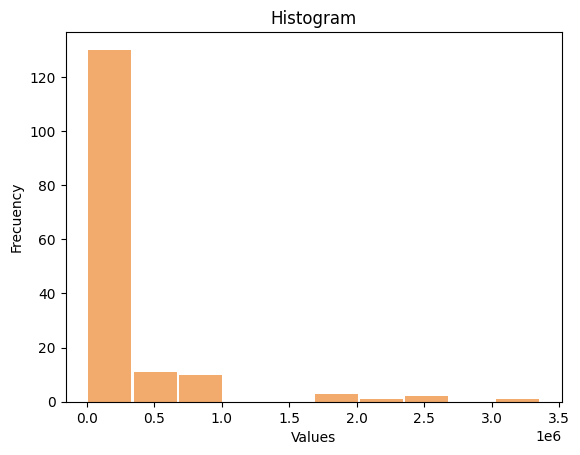

In [ ]:
plt.hist(x=data['Energía [kWh/día]'], color= '#F2AB6D', rwidth=0.95)
plt.xlabel("Values")
plt.ylabel("Frecuency")
plt.title("Histogram")
plt.show()

En el siguiente histograma Emisiones CO2 [Ton/año], tenemos una representacion de la cantidad de emisiones de CO2 que tiene al año, donde la parte horizontal son los porcentajes, y la parte vertical es la cantidad que corresponde a cada porcentaje.

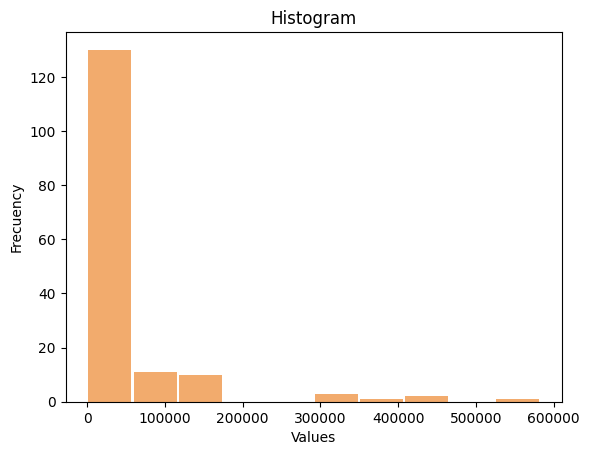

In [ ]:
plt.hist(x=data['Usuarios'], color= '#F2AB6D', rwidth=0.95)
plt.xlabel("Values")
plt.ylabel("Frecuency")
plt.title("Histogram")
plt.show()

# **Gráfico de barras**

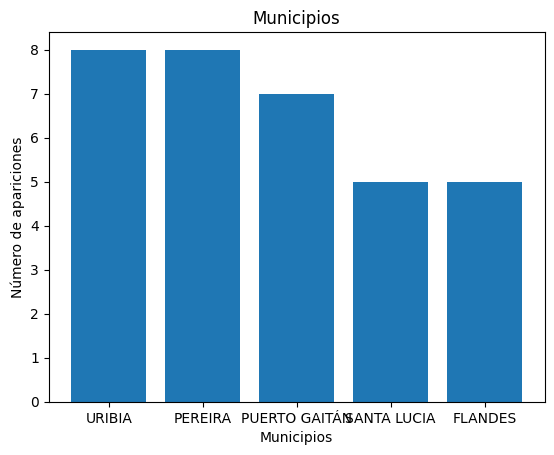

In [ ]:
# Contar las apariciones de los valores en la columna "Municpios"
con = data['Municipio'].value_counts()

# Seleccionar los 5 Municipios con más apariciones
top_municipios = con.nlargest(5)

# Filtrar el DataFrame para incluir solo las filas con las Municipios más comunes
data_top_municipios = data[data['Municipio'].isin(top_municipios.index)]

# Crear un gráfico de barras que muestra la cantidad de personas en cada Municipio
plt.bar(top_municipios.index, top_municipios.values)
plt.title('Municipios')
plt.xlabel('Municipios')
plt.ylabel('Número de apariciones')
plt.show()

Vemos que en la gráfica sacamos los municipios y veces que más repeticiones tienen en los datos como **Uribía**, **Pereira**, **Puerto Gaitán**, de más repeticiones a menos repeticiones vemos que **Uribía** y **Pereira** son los municipios que tienen la mayoría mencionado en los datos con más de 8 repeticiones.


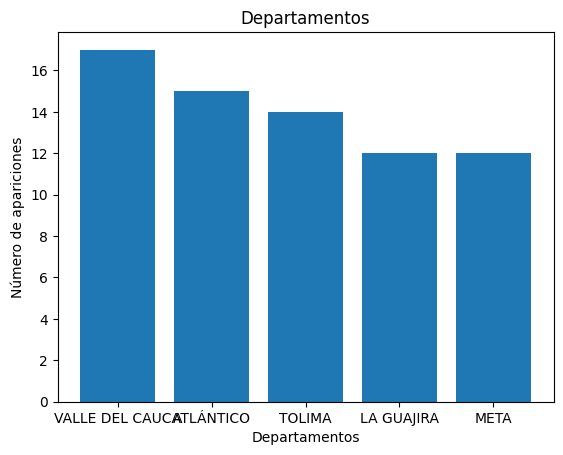

In [ ]:
# Contar las apariciones de los valores en la columna "Departamentos"
con = data['Departamento'].value_counts()

# Seleccionar los 5 departamentos con más apariciones
top_departamentos = con.nlargest(5)

# Filtrar el DataFrame para incluir solo las filas con las departamentos más comunes
data_top_departamentos = data[data['Departamento'].isin(top_departamentos.index)]

# Crear un gráfico de barras que muestra la cantidad de personas en cada departamento
plt.bar(top_departamentos.index, top_departamentos.values)
plt.title('Departamentos')
plt.xlabel('Departamentos')
plt.ylabel('Número de apariciones')
plt.show()

Podemos observar que en la grafica nos salen los departamentos y las veces que mas tienden a repetirse en la data, como son valle del cauca, Atlantico, Tolima, La guajira, los cuales vienen de mayor repiticiones a menos, podemos ver que Valle del cauca es el departamentos que mas repiticiones tiene con más de 16 repeticiones.

# **Gráficos de torta**

Los gráficos de tortas nos permiten tener una mejor vision de cual es la cantidad de datos que hay en la tabla, permitiendonos poder ver los porcentajes para tener la capacidad de hacer un mejor analisis.

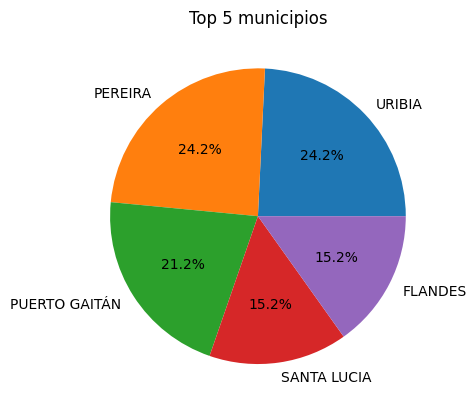

In [ ]:
plt.pie(top_municipios.values, labels=top_municipios.index, autopct='%1.1f%%')
plt.title('Top 5 municipios')
plt.show()

Aquì podemos ver el porcentaje que ocupa los 5 primeros municipios en la data, teniendo como **Pereira** y **Uribia** como los departamento que mas **FNCER(Fuentes No Convencionales de Energía Renovable)** durante este periodo seguido  de **Puerto Gaitán**.

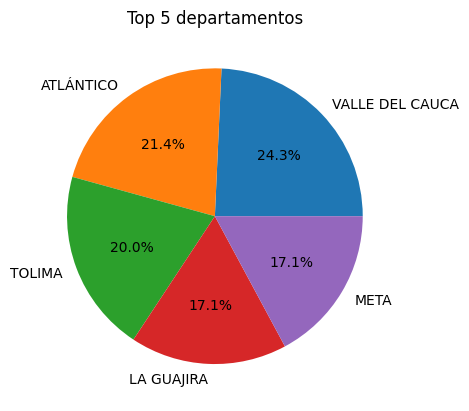

In [ ]:
plt.pie(top_departamentos.values, labels=top_departamentos.index, autopct='%1.1f%%')
plt.title('Top 5 departamentos')
plt.show()

Aquì podemos ver el porcentaje que ocupa los 5 primeros departamentos en la data, teniendo como **Valle del Cauca** como el departamento en el que mas **FNCER(Fuentes No Convencionales de Energía Renovable)** seguido  de **Atlantico** y **Tolima**.

# **Caja de bigotes**


Un gráfico de bigotes es una forma conveniente de representar visualmente grupos de datos numéricos por cuartil. Las líneas paralelas a la caja se denominan "bigotes" y se utilizan para indicar la variabilidad fuera de los cuartiles superior e inferior.


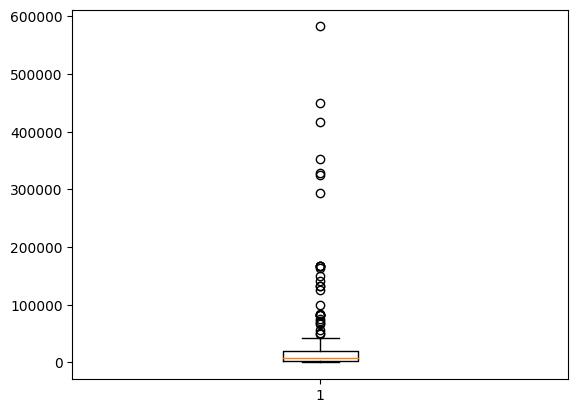

In [ ]:
plt.boxplot(data['Usuarios'])
plt.show()

Tomamos la columna de Usuario para poder hacer la caja de bigotes con esa podemos observar que tenemos muchos datos atipicos que son datos que se sobrepasan del rango que se esta trabajando.

#  **Limpieza de datos atípicos**


In [ ]:
Q1 = data['Usuarios'].quantile(0.18)
print("Primer Cuartil", Q1)

Q3 = data['Usuarios'].quantile(0.65)
print("Tercer Cuartil", Q3)

IQR = Q3 - Q1
print("Rango Intercuartil", IQR)

Mediana = data['Usuarios'].median()
print("Mediana", Mediana)

Valor_Miniom = data['Usuarios'].min()
print("Valor Minimo", Valor_Miniom)

Valor_Maximo = data['Usuarios'].max()
print("Valor Máximo", Valor_Maximo)


Primer Cuartil 1086.42
Tercer Cuartil 16564.0
Rango Intercuartil 15477.58
Mediana 8240.0
Valor Minimo 4
Valor Máximo 582659


Como podemos observar en la anterior sección tenemos demasiados datos atipicos, entonces aqui estamos haciendo la limpieza de los datos, tomamos los valores del primer y tercer cuartil, luego le sacamos la mediana y el valor minimo y el maximo para poder ver que datos tienen. 

In [ ]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI_CALCULADO \n", BI_Calculado)

BS_Calculado = (Q3 + 1.5 * IQR)
print("BS_CALCULADO \n", BS_Calculado)

BI_CALCULADO 
 -22129.949999999997
BS_CALCULADO 
 39780.369999999995


En esta seccion estamos sacando una resta del primer cuartil menos el 1.5 de datos por el rango de caurtil, y luego hacemos otra operacion, el valor del tercer cuartil mas el 1.5 por el rengo de cuartil.

In [ ]:
ubicacion_outliers = ((data['Usuarios'] < BI_Calculado) | (data['Usuarios'] > BS_Calculado))
print("\n Ubicacion de Outliers \n", ubicacion_outliers)


 Ubicacion de Outliers 
 0      False
1      False
2      False
3       True
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Name: Usuarios, Length: 158, dtype: bool


Aqui estamos ubicando donde se encuentran los datos atipicos para saber que datos poder eliminar para que nos salgan datos atipicos en la proxima caja de bigote.

In [ ]:
outliers = data[ubicacion_outliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
                                 Proyecto    Tipo  Capacidad     Departamento  \
3       EL PASO SOLAR (ENEL GREEN POWER)   Solar      67.00            CESAR   
49                          SAN FERNANDO   Solar      61.00             META   
58      LA LOMA SOLAR (ENEL GREEN POWER)   Solar     170.00            CESAR   
69          CSF SAN FELIPE (TRINA SOLAR)   Solar      90.00           TOLIMA   
73             CSF CARTAGO (TRINA SOLAR)   Solar      99.00  VALLE DEL CAUCA   
81                 CAMPANO (TRINA SOLAR)   Solar      99.90          CÓRDOBA   
88                          BETHA (EDPR)  Eólico     270.00       LA GUAJIRA   
89                          ALPHA (EDPR)  Eólico     212.00       LA GUAJIRA   
107                             RUBIALES   Solar      87.00             META   
108                     CHICAMOCHA (1-3)   Solar      59.70        SANTANDER   
109                 PUERTA DE ORO Fase 1   Solar     120.00     CUNDINAMARCA   
110               

Aqui llamamos la data para ver en donde se encuentran los datos atipicos, y saber columnas tenemos con los datos.

In [ ]:
Outliers_Ordenados = outliers.sort_values("Usuarios")
Outliers_Ordenados

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
148,Pubenza PSR2,Solar,50.00,BOGOTÁ D.C.,BOGOTÁ D.C.,11,11001,2023-12-31T00:00:00.000,240000,41618,187500000000,348,70080
135,CARACOLÍ I,Solar,50.00,ATLÁNTICO,MALAMBO,8,8433,2023-08-31T00:00:00.000,240000,41618,187500000000,348,70080
108,CHICAMOCHA (1-3),Solar,59.70,SANTANDER,LOS SANTOS,68,68418,2023-06-30T00:00:00.000,286560,49692,223875000000,416,83676
49,SAN FERNANDO,Solar,61.00,META,CASTILLA LA NUEVA,50,50150,2021-10-22T00:00:00.000,292800,50775,262300000000,425,85498
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.00,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
128,PV LA MATA,Solar,80.00,CESAR,LA GLORIA,20,20383,2023-12-31T00:00:00.000,384000,66590,344000000000,557,112128
139,TEPUY,Solar,83.00,CALDAS,LA DORADA,17,17380,2023-07-31T00:00:00.000,398400,69087,311250000000,578,116333
107,RUBIALES,Solar,87.00,META,PUERTO GAITÁN,50,50568,2023-11-30T00:00:00.000,417600,72416,326250000000,606,121939
69,CSF SAN FELIPE (TRINA SOLAR),Solar,90.00,TOLIMA,ARMERO,73,73055,2023-06-01T00:00:00.000,432000,74913,337500000000,626,126144
150,PARQUE SOLAR FOTOVOLTAICO FUNDACIÓN,Solar,99.00,MAGDALENA,FUNDACIÓN,47,47288,2024-06-30T00:00:00.000,475200,82405,371250000000,689,138758


En esta sección Llamamos a ordenar los datos de la columna usuario, para poder saber el orden de los usuarios, para poder hacer una buena limpieza de datos y que no tengamos en la data los datos atipicos que teniamos antes.

In [ ]:
Ubicacion_sin_out = ((data['Usuarios'] >= BI_Calculado) & (data['Usuarios'] <= BS_Calculado))
sin_outliers = data[Ubicacion_sin_out]
sin_outliers

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.80,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
4,SOLAR CASTILLA ECP,Solar,20.00,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032
5,AGPE TECNOEMPAQUES DE OCCIDENTE,Solar,0.10,VALLE DEL CAUCA,CALI,76,76001,2019-12-19T00:00:00.000,480,83,430000000,1,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,BUGA 1 PARTE 2,Solar,5.94,VALLE DEL CAUCA,SANTA LUCIA,76,76,2022-12-31T00:00:00.000,28512,4944,22275000000,41,8326
154,BUGA 1 PARTE 1,Solar,3.96,VALLE DEL CAUCA,SANTA LUCIA,76,76,2022-07-31T00:00:00.000,19008,3296,14850000000,28,5550
155,REFINERÍA GRB,Solar,21.00,SANTANDER,BARRANCABERMEJA,68,68081,2023-12-31T00:00:00.000,100800,17480,78750000000,146,29434
156,EMSA GD Y AG (34 Proyectos),Solar,1.90,META,VILLAVICENCIO,50,50001,2022-05-31T00:00:00.000,9120,1582,8170000000,13,2663


En esta seccion de la tabla le pedimos que nos de la ubicacion de lo data en la columna usuario, sin datos atipicos para poder realizar otra vez la caja de bigotes sin que nos salgan mas datos atipicos.

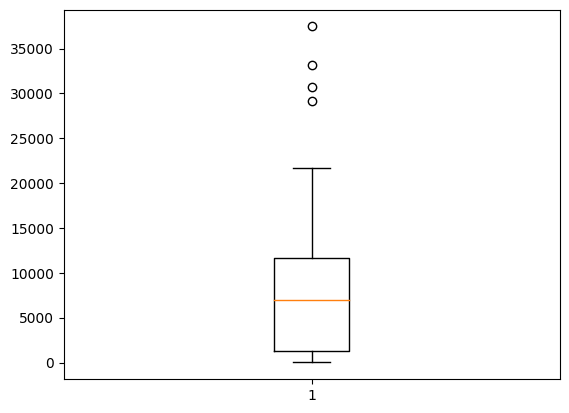

In [ ]:
plt.boxplot(x=sin_outliers['Usuarios'])
plt.show("Usuarios")
plt.show("Cantidad")

Luego de hacer todo el proceso de la limpieza de los datos, mostramos otra vez la caja de bigotes, para tratar de ver que no hayan datos atipicos, pero como podemos observar que todavia tenemos datos atipicos y tenemos que hacer otra vez la limpieza de datos.

In [ ]:
Q1 = sin_outliers['Usuarios'].quantile(0.25)
print("Primer Cuartil", Q1)

Q3 = sin_outliers['Usuarios'].quantile(0.75)
print("Tercer Cuartil", Q3)

IQR = Q3 - Q1
print("Rango Intercuartil", IQR)

Mediana = sin_outliers['Usuarios'].median()
print("Mediana", Mediana)

Valor_Miniom = sin_outliers['Usuarios'].min()
print("Valor Minimo", Valor_Miniom)

Valor_Maximo = sin_outliers['Usuarios'].max()
print("Valor Máximo", Valor_Maximo)

Primer Cuartil 1249.0
Tercer Cuartil 11595.0
Rango Intercuartil 10346.0
Mediana 6975.0
Valor Minimo 4
Valor Máximo 37457


Como podemos observar en la anterior sección tenemos demasiados datos atipicos, entonces aqui estamos haciendo la limpieza de los datos, tomamos los valores del primer y tercer cuartil, luego le sacamos la mediana y el valor minimo y el maximo para poder ver que datos tienen. 

In [ ]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI_CALCULADO \n", BI_Calculado)

BS_Calculado = (Q3 + 1.5 * IQR)
print("BS_CALCULADO \n", BS_Calculado)

BI_CALCULADO 
 -14270.0
BS_CALCULADO 
 27114.0


En esta seccion estamos sacando una resta del primer cuartil menos el 1.5 de datos por el rango de caurtil, y luego hacemos otra operacion, el valor del tercer cuartil mas el 1.5 por el rengo de cuartil.

In [ ]:
ubicacion_outliers = ((sin_outliers['Usuarios'] < BI_Calculado) | (sin_outliers['Usuarios'] > BS_Calculado))
print("\n Ubicacion de Outliers \n", ubicacion_outliers)


 Ubicacion de Outliers 
 0       True
1      False
2      False
4      False
5      False
       ...  
153    False
154    False
155    False
156    False
157    False
Name: Usuarios, Length: 125, dtype: bool


Aqui estamos ubicando donde se encuentran los datos atipicos para saber que datos poder eliminar para que nos salgan datos atipicos en la proxima caja de bigote.

In [ ]:
outliers = sin_outliers[ubicacion_outliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
                          Proyecto    Tipo  Capacidad        Departamento  \
0                       JEPIRACHI  Eólico      18.42          LA GUAJIRA   
57        PARQUE EÓLICO GUAJIRA I  Eólico      19.90          LA GUAJIRA   
125          SOL DE GAMARRITA 1-3   Solar      45.00               CESAR   
147  Parque Fotovoltaico Sunnorte   Solar      35.00  NORTE DE SANTANDER   

       Municipio  Código Departamento  Código Municipio  \
0         URIBIA                   44             44847   
57        URIBIA                   44             44847   
125    AGUACHICA                   20             20011   
147  SANTA LUCIA                   54                54   

          Fecha estimada FPO  Energía [kWh/día]  Usuarios  \
0    2004-04-27T00:00:00.000             176832     30665   
57   2021-12-31T00:00:00.000             191040     33128   
125  2023-02-09T00:00:00.000             216000     37457   
147  2023-12-31T00:00:00.000             168000     29133

Aqui llamamos la data para ver en donde se encuentran los datos atipicos, y saber columnas tenemos con los datos.

In [ ]:
Outliers_Ordenados = outliers.sort_values("Usuarios")
Outliers_Ordenados

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
147,Parque Fotovoltaico Sunnorte,Solar,35.00,NORTE DE SANTANDER,SANTA LUCIA,54,54,2023-12-31T00:00:00.000,168000,29133,131250000000,244,49056
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
57,PARQUE EÓLICO GUAJIRA I,Eólico,19.90,LA GUAJIRA,URIBIA,44,44847,2021-12-31T00:00:00.000,191040,33128,85570000000,55,55784
125,SOL DE GAMARRITA 1-3,Solar,45.00,CESAR,AGUACHICA,20,20011,2023-02-09T00:00:00.000,216000,37457,168750000000,313,63072


En esta sección Llamamos a ordenar los datos de la columna usuario, para poder saber el orden de los usuarios, para poder hacer una buena limpieza de datos y que no tengamos en la data los datos atipicos que teniamos antes.

In [ ]:
Ubicacion_sin_out = ((sin_outliers['Usuarios'] >= BI_Calculado) & (sin_outliers['Usuarios'] <= BS_Calculado))
sin_outliers_2 = sin_outliers[Ubicacion_sin_out]
sin_outliers_2

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.80,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
4,SOLAR CASTILLA ECP,Solar,20.00,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032
5,AGPE TECNOEMPAQUES DE OCCIDENTE,Solar,0.10,VALLE DEL CAUCA,CALI,76,76001,2019-12-19T00:00:00.000,480,83,430000000,1,140
6,RADAR FAC SAN ANDRÉS,Solar,0.01,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,88,88001,2019-12-30T00:00:00.000,48,8,43000000,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,BUGA 1 PARTE 2,Solar,5.94,VALLE DEL CAUCA,SANTA LUCIA,76,76,2022-12-31T00:00:00.000,28512,4944,22275000000,41,8326
154,BUGA 1 PARTE 1,Solar,3.96,VALLE DEL CAUCA,SANTA LUCIA,76,76,2022-07-31T00:00:00.000,19008,3296,14850000000,28,5550
155,REFINERÍA GRB,Solar,21.00,SANTANDER,BARRANCABERMEJA,68,68081,2023-12-31T00:00:00.000,100800,17480,78750000000,146,29434
156,EMSA GD Y AG (34 Proyectos),Solar,1.90,META,VILLAVICENCIO,50,50001,2022-05-31T00:00:00.000,9120,1582,8170000000,13,2663


En esta sección Llamamos a ordenar los datos de la columna usuario, para poder saber el orden de los usuarios, para poder hacer una buena limpieza de datos y que no tengamos en la data los datos atipicos que teniamos antes.

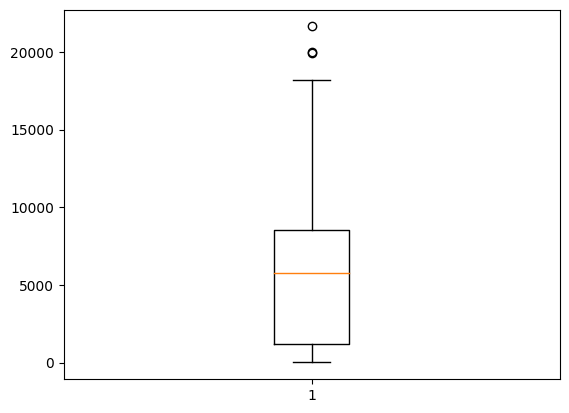

In [ ]:
plt.boxplot(x = sin_outliers_2['Usuarios'])
plt.show("Usuarios")
plt.show("Cantidad")

Luego de hacer todo el proceso de la limpieza de los datos, mostramos otra vez la caja de bigotes, para tratar de ver que no hayan datos atipicos, pero como podemos observar que todavia tenemos datos atipicos y tenemos que hacer otra vez la limpieza de datos.

In [ ]:
Q1 = sin_outliers['Usuarios'].quantile(0.18)
print("Primer Cuartil", Q1)

Q3 = sin_outliers['Usuarios'].quantile(0.65)
print("Tercer Cuartil", Q3)

IQR = Q3 - Q1
print("Rango Intercuartil", IQR)

Mediana = sin_outliers['Usuarios'].median()
print("Mediana", Mediana)

Valor_Miniom = sin_outliers['Usuarios'].min()
print("Valor Minimo", Valor_Miniom)

Valor_Maximo = sin_outliers['Usuarios'].max()
print("Valor Máximo", Valor_Maximo)

Primer Cuartil 577.1200000000001
Tercer Cuartil 8240.0
Rango Intercuartil 7662.88
Mediana 6975.0
Valor Minimo 4
Valor Máximo 37457


Como podemos observar en la anterior sección tenemos demasiados datos atipicos, entonces aqui estamos haciendo la limpieza de los datos, tomamos los valores del primer y tercer cuartil, luego le sacamos la mediana y el valor minimo y el maximo para poder ver que datos tienen. 

In [ ]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI_CALCULADO \n", BI_Calculado)

BS_Calculado = (Q3 + 1.5 * IQR)
print("BS_CALCULADO \n", BS_Calculado)

BI_CALCULADO 
 -10917.199999999999
BS_CALCULADO 
 19734.32


En esta seccion estamos sacando una resta del primer cuartil menos el 1.5 de datos por el rango de caurtil, y luego hacemos otra operacion, el valor del tercer cuartil mas el 1.5 por el rengo de cuartil.

In [ ]:
ubicacion_outliers = ((sin_outliers['Usuarios'] < BI_Calculado) | (sin_outliers['Usuarios'] > BS_Calculado))
print("\n Ubicacion de Outliers \n", ubicacion_outliers)


 Ubicacion de Outliers 
 0       True
1      False
2      False
4      False
5      False
       ...  
153    False
154    False
155    False
156    False
157    False
Name: Usuarios, Length: 125, dtype: bool


Aqui estamos ubicando donde se encuentran los datos atipicos para saber que datos poder eliminar para que nos salgan datos atipicos en la proxima caja de bigote.

In [ ]:
outliers = sin_outliers[ubicacion_outliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
                          Proyecto    Tipo  Capacidad        Departamento  \
0                       JEPIRACHI  Eólico      18.42          LA GUAJIRA   
41   EPM GD Y AG (1469 Proyectos)   Solar      23.92           ANTIOQUIA   
57        PARQUE EÓLICO GUAJIRA I  Eólico      19.90          LA GUAJIRA   
82                         WESP01  Eólico      12.00          LA GUAJIRA   
85        BRISAS – YAGUARÁ – AIPE   Solar      26.00               HUILA   
125          SOL DE GAMARRITA 1-3   Solar      45.00               CESAR   
147  Parque Fotovoltaico Sunnorte   Solar      35.00  NORTE DE SANTANDER   

       Municipio  Código Departamento  Código Municipio  \
0         URIBIA                   44             44847   
41      MEDELLÍN                    5              5001   
57        URIBIA                   44             44847   
82        URIBIA                   44             44847   
85       YAGUARÁ                   41             41885   
125    AGUACHIC

Aqui llamamos la data para ver en donde se encuentran los datos atipicos, y saber columnas tenemos con los datos.

In [ ]:
Outliers_Ordenados = outliers.sort_values("Usuarios")
Outliers_Ordenados

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
41,EPM GD Y AG (1469 Proyectos),Solar,23.92,ANTIOQUIA,MEDELLÍN,5,5001,2022-05-31T00:00:00.000,114816,19910,102856000000,166,33526
82,WESP01,Eólico,12.00,LA GUAJIRA,URIBIA,44,44847,2022-08-05T00:00:00.000,115200,19977,51600000000,33,33638
85,BRISAS – YAGUARÁ – AIPE,Solar,26.00,HUILA,YAGUARÁ,41,41885,2022-12-31T00:00:00.000,124800,21642,97500000000,181,36442
147,Parque Fotovoltaico Sunnorte,Solar,35.00,NORTE DE SANTANDER,SANTA LUCIA,54,54,2023-12-31T00:00:00.000,168000,29133,131250000000,244,49056
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
57,PARQUE EÓLICO GUAJIRA I,Eólico,19.90,LA GUAJIRA,URIBIA,44,44847,2021-12-31T00:00:00.000,191040,33128,85570000000,55,55784
125,SOL DE GAMARRITA 1-3,Solar,45.00,CESAR,AGUACHICA,20,20011,2023-02-09T00:00:00.000,216000,37457,168750000000,313,63072


En esta sección Llamamos a ordenar los datos de la columna usuario, para poder saber el orden de los usuarios, para poder hacer una buena limpieza de datos y que no tengamos en la data los datos atipicos que teniamos antes.

In [ ]:
Ubicacion_sin_out = ((sin_outliers['Usuarios'] >= BI_Calculado) & (sin_outliers['Usuarios'] <= BS_Calculado))
sin_outliers_2 = sin_outliers[Ubicacion_sin_out]
sin_outliers_2

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.80,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
4,SOLAR CASTILLA ECP,Solar,20.00,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032
5,AGPE TECNOEMPAQUES DE OCCIDENTE,Solar,0.10,VALLE DEL CAUCA,CALI,76,76001,2019-12-19T00:00:00.000,480,83,430000000,1,140
6,RADAR FAC SAN ANDRÉS,Solar,0.01,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,88,88001,2019-12-30T00:00:00.000,48,8,43000000,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,BUGA 1 PARTE 2,Solar,5.94,VALLE DEL CAUCA,SANTA LUCIA,76,76,2022-12-31T00:00:00.000,28512,4944,22275000000,41,8326
154,BUGA 1 PARTE 1,Solar,3.96,VALLE DEL CAUCA,SANTA LUCIA,76,76,2022-07-31T00:00:00.000,19008,3296,14850000000,28,5550
155,REFINERÍA GRB,Solar,21.00,SANTANDER,BARRANCABERMEJA,68,68081,2023-12-31T00:00:00.000,100800,17480,78750000000,146,29434
156,EMSA GD Y AG (34 Proyectos),Solar,1.90,META,VILLAVICENCIO,50,50001,2022-05-31T00:00:00.000,9120,1582,8170000000,13,2663


En esta sección Llamamos a ordenar los datos de la columna usuario, para poder saber el orden de los usuarios, para poder hacer una buena limpieza de datos y que no tengamos en la data los datos atipicos que teniamos antes.

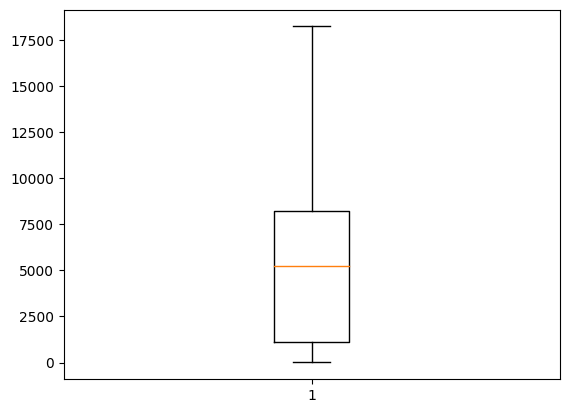

In [ ]:
plt.boxplot(x = sin_outliers_2['Usuarios'])
plt.show("Usuarios")


Luego de hacer todo el proceso de la limpieza de los datos, mostramos otra vez la caja de bigotes, para que nos muestre que ya no tenemos datos atipicos, es decir hicimos la limpieza de datos atipicos y  terminamos con la limpieza de datos.

 # **Columna Energia**

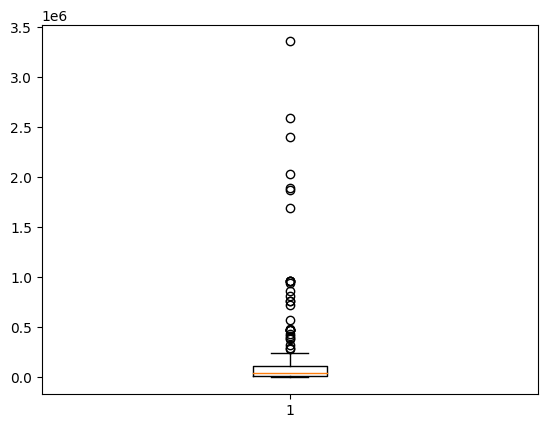

In [ ]:
plt.boxplot(data['Energía [kWh/día]'])
plt.show()

Como primer resultado en la caja de bigote que realizamos para la columna **Energia** apreciamos que tenemos muchos valores que estan por fuera de la misma, lo que son llamado datos atipicos, por lo que tenemos que realizar la limpieza de estos datos.

#  **Limpieza de datos atípicos**

In [ ]:
Q1 = data['Energía [kWh/día]'].quantile(0.25)
print("Primer Cuartil", Q1)

Q3 = data['Energía [kWh/día]'].quantile(0.65)
print("Tercer Cuartil", Q3)

IQR = Q3 - Q1
print("Rango Intercuartil", IQR)

Mediana = data['Energía [kWh/día]'].median()
print("Mediana", Mediana)

Valor_Miniom = data['Energía [kWh/día]'].min()
print("Valor Minimo", Valor_Miniom)

Valor_Maximo = data['Energía [kWh/día]'].max()
print("Valor Máximo", Valor_Maximo)


Primer Cuartil 10920.0
Tercer Cuartil 95520.0
Rango Intercuartil 84600.0
Mediana 47520.0
Valor Minimo 21
Valor Máximo 3360000


Como podemos observar en la anterior sección tenemos demasiados datos atipicos, entonces aqui estamos haciendo la limpieza de los datos, tomamos los valores del primer y tercer cuartil, luego le sacamos la mediana y el valor minimo y el maximo para poder ver que datos tienen.

In [ ]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI_CALCULADO \n", BI_Calculado)

BS_Calculado = (Q3 + 1.5 * IQR)
print("BS_CALCULADO \n", BS_Calculado)

BI_CALCULADO 
 -115980.0
BS_CALCULADO 
 222420.0


En esta seccion estamos sacando una resta del primer cuartil menos el 1.5 de datos por el rango de caurtil, y luego hacemos otra operacion, el valor del tercer cuartil mas el 1.5 por el rengo de cuartil.

In [ ]:
ubicacion_outliers = ((sin_outliers['Energía [kWh/día]'] < BI_Calculado) | (sin_outliers['Energía [kWh/día]'] > BS_Calculado))
print("\n Ubicacion de Outliers \n", ubicacion_outliers)


 Ubicacion de Outliers 
 0      False
1      False
2      False
4      False
5      False
       ...  
153    False
154    False
155    False
156    False
157    False
Name: Energía [kWh/día], Length: 125, dtype: bool


Aqui estamos ubicando donde se encuentran los datos atipicos para saber que datos poder eliminar para que nos salgan datos atipicos en la proxima caja de bigote.

In [ ]:
outliers = sin_outliers[ubicacion_outliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
 Empty DataFrame
Columns: [Proyecto, Tipo, Capacidad, Departamento, Municipio, Código Departamento, Código Municipio, Fecha estimada FPO, Energía [kWh/día], Usuarios, Inversión estimada [COP], Empleos estimados, Emisiones CO2 [Ton/año]]
Index: []


Aqui llamamos la data para ver en donde se encuentran los datos atipicos, y saber columnas tenemos con los datos.

In [ ]:
Outliers_Ordenados = outliers.sort_values('Energía [kWh/día]')
Outliers_Ordenados

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]



En esta sección llamamos a ordenar los datos de la columna usuario, para poder saber el orden de los usuarios, para poder hacer una buena limpieza de datos y que no tengamos en la data los datos atipicos que teniamos antes.

In [ ]:
Ubicacion_sin_out = ((sin_outliers['Energía [kWh/día]'] >= BI_Calculado) & (sin_outliers['Energía [kWh/día]'] <= BS_Calculado))
sin_outliers_2 = sin_outliers[Ubicacion_sin_out]
sin_outliers_2

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.80,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
4,SOLAR CASTILLA ECP,Solar,20.00,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032
5,AGPE TECNOEMPAQUES DE OCCIDENTE,Solar,0.10,VALLE DEL CAUCA,CALI,76,76001,2019-12-19T00:00:00.000,480,83,430000000,1,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,BUGA 1 PARTE 2,Solar,5.94,VALLE DEL CAUCA,SANTA LUCIA,76,76,2022-12-31T00:00:00.000,28512,4944,22275000000,41,8326
154,BUGA 1 PARTE 1,Solar,3.96,VALLE DEL CAUCA,SANTA LUCIA,76,76,2022-07-31T00:00:00.000,19008,3296,14850000000,28,5550
155,REFINERÍA GRB,Solar,21.00,SANTANDER,BARRANCABERMEJA,68,68081,2023-12-31T00:00:00.000,100800,17480,78750000000,146,29434
156,EMSA GD Y AG (34 Proyectos),Solar,1.90,META,VILLAVICENCIO,50,50001,2022-05-31T00:00:00.000,9120,1582,8170000000,13,2663


En esta sección Llamamos a ordenar los datos de la columna usuario, para poder saber el orden de los usuarios, para poder hacer una buena limpieza de datos y que no tengamos en la data los datos atipicos que teniamos antes.

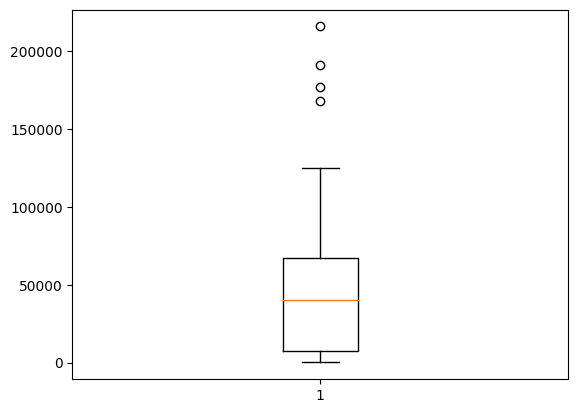

In [ ]:
plt.boxplot(x=sin_outliers['Energía [kWh/día]'])
plt.show("Energía [kWh/día]")
plt.show("Cantidad")

Luego de hacer todo el proceso de la limpieza de los datos, mostramos otra vez la caja de bigotes, para que nos muestre que ya no tenemos datos atipicos, en este caso seguimos encontrando datos atipicos pero la explicación de estos es que los consumos de energia estaban estandarizados para llegar a los **15000** KWH pero se espero y sucedio que se fuera superada esta cantidad.